<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    1007 non-null   int64 
 1   customer_name  1007 non-null   object
 2   gender         989 non-null    object
 3   age            1007 non-null   int64 
 4   home_address   1007 non-null   object
 5   zip_code       1007 non-null   int64 
 6   city           1007 non-null   object
 7   state          1007 non-null   object
 8   country        1007 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.9+ KB
Jumlah duplikasi:  6
       customer_id          age     zip_code
count  1007.000000  1007.000000  1007.000000
mean    501.726912    50.929494  5012.538232
std     288.673238    30.516299  2885.836112
min       1.000000    20.000000     2.000000
25%     252.500000    34.000000  2403.500000
50%     502.000000    50.000000  5087.000000
75%     751.500000    65.000000  7

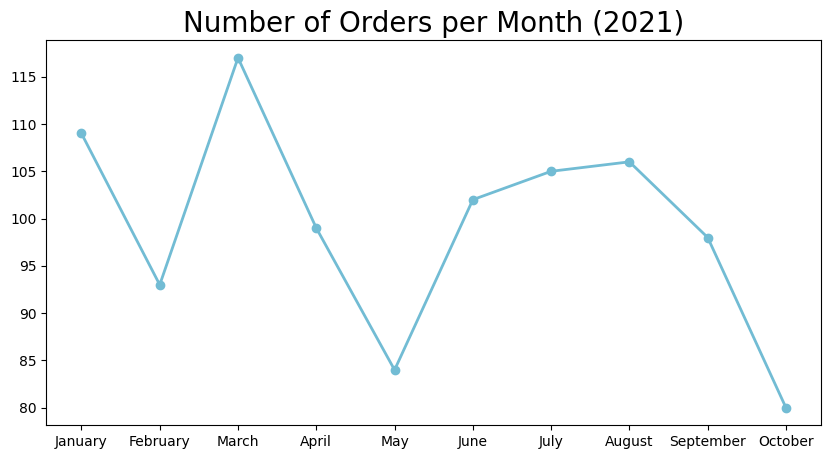

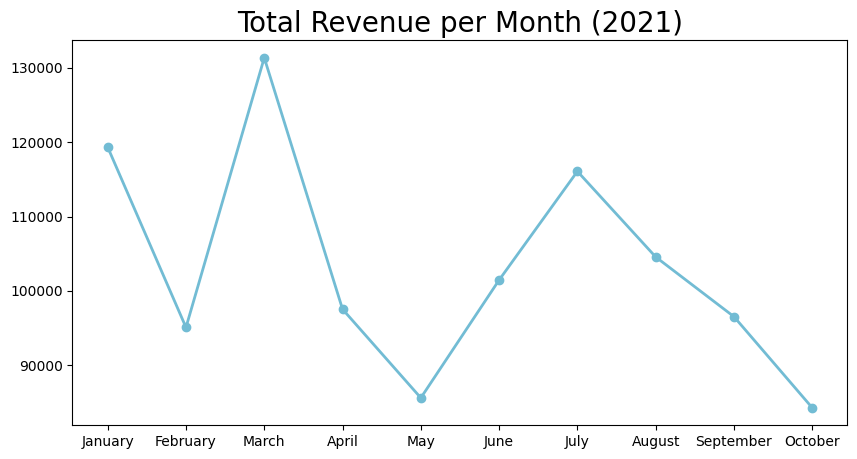

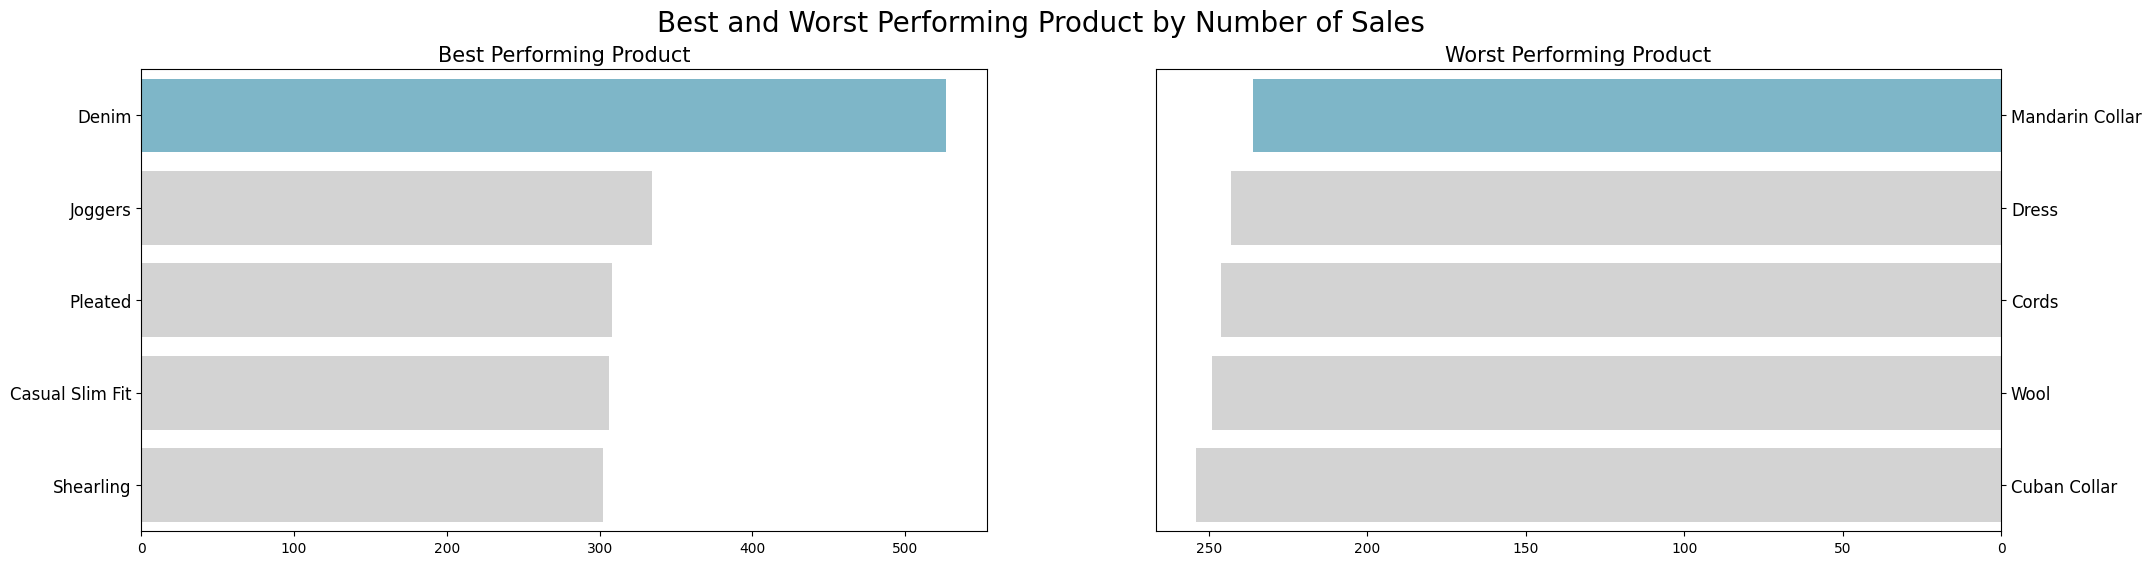

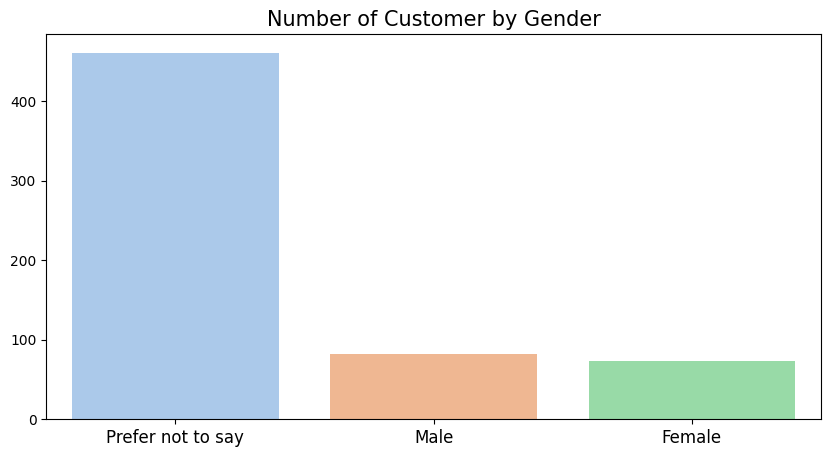

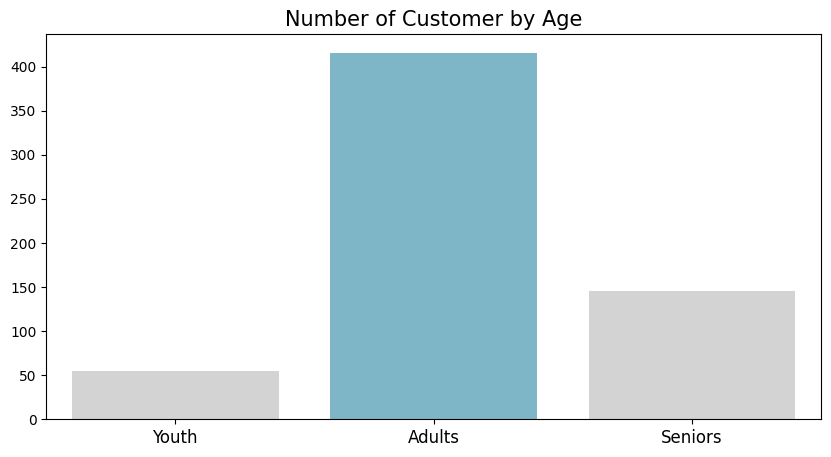

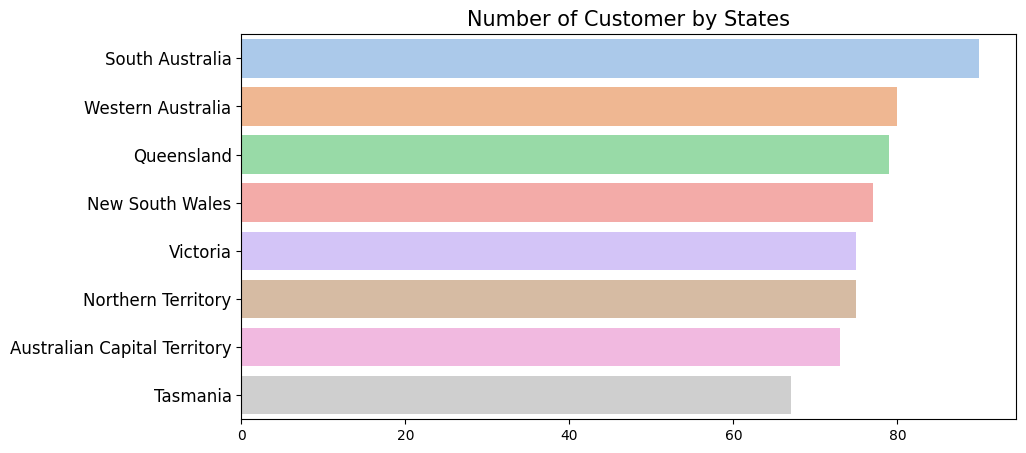

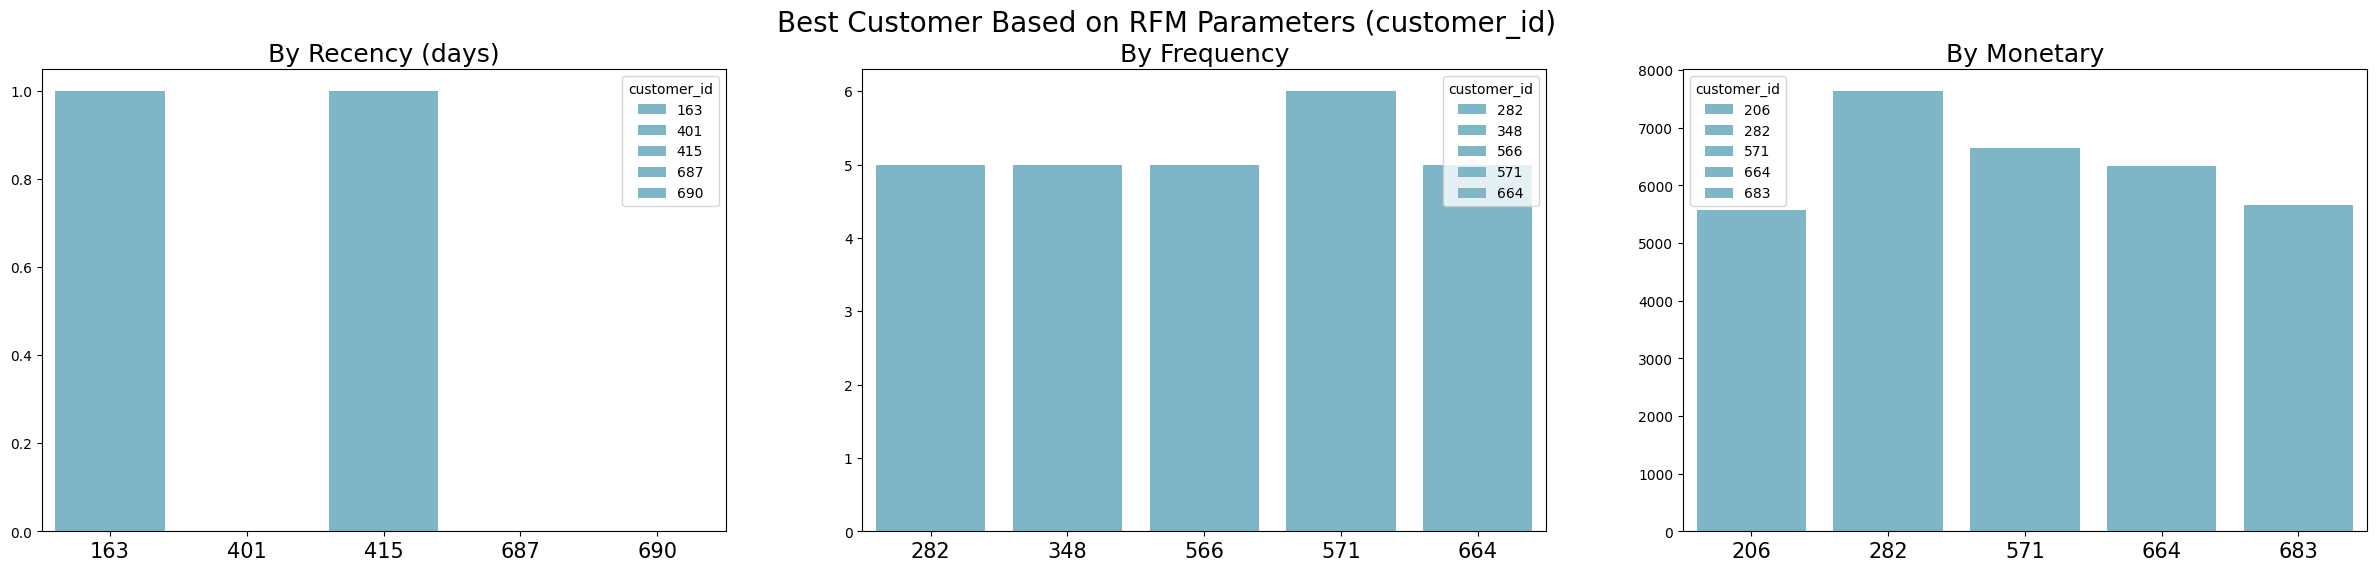

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Memuat tabel customers
customers_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/customers.csv")
customers_df.head()
customers_df.info()
customers_df.isna().sum()
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
print(customers_df.describe())
customers_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", customers_df.duplicated().sum())
customers_df[customers_df.gender.isna()]
customers_df.gender.value_counts()
customers_df.fillna(value="Prefer not to say", inplace=True)
customers_df.isna().sum()
customers_df[customers_df.age == customers_df.age.max()]
customers_df.loc[customers_df['age'] == customers_df['age'].max(), 'age'] = 70
customers_df[customers_df.age == customers_df.age.max()]
customers_df.loc[customers_df['age'] == customers_df['age'].max(), 'age'] = 50
customers_df.describe()
print(customers_df.describe(include="all"))

print(customers_df.groupby(by="gender").agg({
    "customer_id": "nunique",
    "age": ["max", "min", "mean", "std"]
}))
print(customers_df.groupby(by="city").customer_id.nunique().sort_values(ascending=False))
print(customers_df.groupby(by="state").customer_id.nunique().sort_values(ascending=False))



#Load tabel orders
orders_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/orders.csv")
orders_df.head()
orders_df.info()
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
print(orders_df.describe())
datetime_columns = ["order_date", "delivery_date"]
 
for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])
orders_df.info()

delivery_time = orders_df["delivery_date"] - orders_df["order_date"]
delivery_time = delivery_time.apply(lambda x: x.total_seconds())
orders_df["delivery_time"] = round(delivery_time/86400)
print(orders_df["delivery_time"])
print(orders_df.describe(include="all"))

customer_id_in_orders_df =  orders_df.customer_id.tolist()
customers_df["status"] = customers_df["customer_id"].apply(lambda x: "Active" if x in customer_id_in_orders_df else "Non Active")
print(customers_df.sample(5))

customers_df.groupby(by="status").customer_id.count()

orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
print(orders_customers_df.head())

print(orders_customers_df.groupby(by="city").order_id.nunique().sort_values(ascending=False).reset_index().head(10))

print(orders_customers_df.groupby(by="state").order_id.nunique().sort_values(ascending=False))

print(orders_customers_df.groupby(by="gender").order_id.nunique().sort_values(ascending=False))

orders_customers_df["age_group"] = orders_customers_df.age.apply(lambda x: "Youth" if x <= 24 else ("Seniors" if x > 64 else "Adults"))
print(orders_customers_df.groupby(by="age_group").order_id.nunique().sort_values(ascending=False))

#Memuat tabel product
product_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/products.csv")
product_df.head()
product_df.info()
print("Jumlah duplikasi: ", product_df.duplicated().sum())
print(product_df.describe())
product_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", product_df.duplicated().sum())


#Load tabel sales
sales_df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/DicodingCollection/sales.csv")
sales_df.head()
sales_df.info()
sales_df.isna().sum()
print("Jumlah duplikasi: ", sales_df.duplicated().sum())
sales_df.describe()
sales_df[sales_df.total_price.isna()]
sales_df["total_price"] = sales_df["price_per_unit"] * sales_df["quantity"]
sales_df.isna().sum()

print(product_df.describe(include="all"))
print(sales_df.describe(include="all"))
print(product_df.sort_values(by="price", ascending=False))
product_df.groupby(by="product_type").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price":  ["min", "max"]
})
 
product_df.groupby(by="product_name").agg({
    "product_id": "nunique",
    "quantity": "sum",
    "price": ["min", "max"]
})

sales_product_df = pd.merge(
    left=sales_df,
    right=product_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
sales_product_df.head()

sales_product_df.groupby(by="product_type").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
})

sales_product_df.groupby(by="product_name").agg({
    "sales_id": "nunique",
    "quantity_x": "sum",
    "total_price": "sum"
}).sort_values(by="total_price", ascending=False)

all_df = pd.merge(
    left=sales_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

all_df.groupby(by=["state", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})

all_df.groupby(by=["gender", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})
 
all_df.groupby(by=["age_group", "product_type"]).agg({
    "quantity_x": "sum",
    "total_price": "sum"
})


monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%Y-%m')
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
monthly_orders_df.head()

monthly_orders_df = all_df.resample(rule='ME', on='order_date').agg({
    "order_id": "nunique",
    "total_price": "sum"
})
monthly_orders_df.index = monthly_orders_df.index.strftime('%B') #mengubah format order date menjadi nama bulan
 
monthly_orders_df = monthly_orders_df.reset_index()
monthly_orders_df.rename(columns={
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)
 
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["order_date"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2021)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(
    monthly_orders_df["order_date"],
    monthly_orders_df["revenue"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Total Revenue per Month (2021)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


sum_order_items_df = all_df.groupby("product_name").quantity_x.sum().sort_values(ascending=False).reset_index()
sum_order_items_df.head(15)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    x="quantity_x", 
    y="product_name", 
    data=sum_order_items_df.head(5),
    hue="product_name", 
    palette=colors, 
    ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Performing Product", loc="center", fontsize=15)
ax[0].tick_params(axis ='y', labelsize=12)
 
sns.barplot(
    x="quantity_x", 
    y="product_name", 
    data=sum_order_items_df.sort_values(by="quantity_x", ascending=True).head(5),
    hue="product_name",
    palette=colors, 
    ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Worst Performing Product", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)
 
plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()

bygender_df = all_df.groupby(by="gender").customer_id.nunique().reset_index()
bygender_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
 
plt.figure(figsize=(10, 5))
 
sns.barplot(
    y="customer_count", 
    x="gender",
    hue="gender",
    data=bygender_df.sort_values(by="customer_count", ascending=False),
    palette=sns.color_palette("pastel", n_colors=len(bygender_df))
)
plt.title("Number of Customer by Gender", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

byage_df = all_df.groupby(by="age_group").customer_id.nunique().reset_index()
byage_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
byage_df
byage_df['age_group'] = pd.Categorical(byage_df['age_group'], ["Youth", "Adults", "Seniors"])
plt.figure(figsize=(10, 5))
colors_ = ["#D3D3D3", "#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
 
sns.barplot(
    y="customer_count", 
    x="age_group",
    hue="age_group",
    data=byage_df.sort_values(by="age_group", ascending=False),
    palette=sns.color_palette(["#D3D3D3", "#72BCD4", "#D3D3D3"])
)
plt.title("Number of Customer by Age", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

bystate_df = all_df.groupby(by="state").customer_id.nunique().reset_index()
bystate_df.rename(columns={
    "customer_id": "customer_count"
}, inplace=True)
bystate_df
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="customer_count", 
    y="state",
    hue="state",
    data=bystate_df.sort_values(by="customer_count", ascending=False),
    palette=sns.color_palette("pastel", n_colors=len(bystate_df))
)
plt.title("Number of Customer by States", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()


rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_date": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "total_price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = orders_df["order_date"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency", x="customer_id", hue="customer_id",data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", hue="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()